# Anime Analysis 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_pickle("anime_df.pkl")
#df.to_pickle("anime_df.pkl")

In [3]:
df

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
0,9.410,73986.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,NaN,2009.0,2010.0,[Bones],"[Action, Adventure, Drama, Fantasy, Mystery, S...",The foundation of alchemy is based on the law ...
1,9.356,29247.0,your name.,Kimi no Na wa.,Movie,1.0,107.0,2016.0,2016.0,[CoMix Wave Inc.],"[Drama, Romance, Body Swapping, Opposites Attr...",Mitsuha and Taki are two total strangers livin...
2,9.334,19592.0,A Silent Voice,Koe no Katachi,Movie,1.0,130.0,2016.0,2016.0,[Kyoto Animation],"[Drama, Melancholy, School Life, Bullying, Mat...","After transferring into a new school, a deaf g..."
3,9.320,11195.0,Haikyuu!! Karasuno High School vs Shiratorizaw...,Haikyuu!! 3rd Season: Karasuno High vs. Shira...,TV,10.0,NaN,2016.0,2016.0,[Production I.G],"[Shounen, Sports, Animeism, School Club, Schoo...","Picking up where the second season ended, the ..."
4,9.296,18788.0,My Hero Academia 3,Boku no Hero Academia 3,TV,25.0,NaN,2018.0,2018.0,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Super...",Third season of My Hero Academia.
5,9.288,2939.0,Mob Psycho 100 II,NaN,TV,12.0,NaN,2019.0,NaN,[Bones],"[Action, Comedy, Shounen, Psychic Powers, Psyc...",Second Season of Mob Psycho 100.
6,9.274,15322.0,Haikyuu!! Second Season,NaN,TV,25.0,NaN,2015.0,2016.0,[Production I.G],"[Shounen, Sports, School Club, School Life, To...","After losing to Aoba Johsai at the Inter-High,..."
7,9.266,5375.0,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Gintama The Movie: The Final Chapter - Be Fore...,Movie,1.0,111.0,2013.0,2013.0,[Sunrise],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...","While watching a movie, Gintoki comes upon a ""..."
8,9.264,29623.0,My Hero Academia 2,Boku no Hero Academia 2,TV,25.0,NaN,2017.0,2017.0,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Schoo...",In a world where eighty percent of the populat...
9,9.262,6192.0,Gintama (2015),Gintama°,TV,51.0,NaN,2015.0,2016.0,[BN Pictures],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...",Fourth season of Gintama.


In [4]:
df['Votes'].min()

10.0

In [5]:
df.isnull().sum()

Rating         2717
Votes          2717
Title             0
Alt Title      7482
Format            0
Episodes        387
Duration       5342
Start Year      187
End Year        343
Studio         3724
Tags            338
Description    5298
dtype: int64

In [6]:
df['Format'].value_counts()

TV             4215
Movie          2279
OVA            1971
Web            1129
Music Video    1124
DVD Special     776
Other           646
TV Special      541
Name: Format, dtype: int64

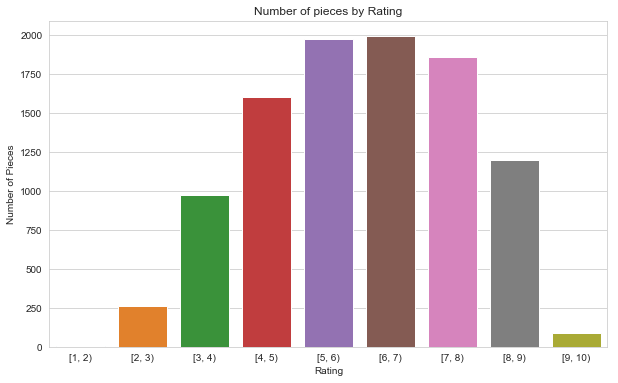

In [11]:
bins = range(1, 11)
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
rating_bins = sns.barplot(x='index', y=0, data=pd.DataFrame(pd.cut(list(df['Rating']), bins, right=False).value_counts()).reset_index())
_ = rating_bins.set(xlabel='Rating', ylabel='Number of Pieces', title='Number of pieces by Rating')


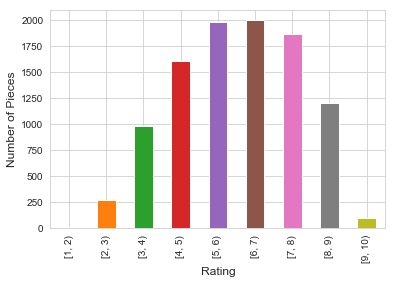

In [12]:
bins = range(1, 11)
ax = pd.cut(list(df['Rating']), bins, right=False).value_counts().plot(kind='bar')
ax.set_xlabel('Rating', fontsize=12)
_ = ax.set_ylabel('Number of Pieces', fontsize=12)

In [13]:
def contains (col, elems):
    booleans = []
    for tags in df[col]:
        exists = True
        for item in elems:
            if type(tags) == float:
                exists = False
            elif item not in tags:
                exists = False
        if type(tags) == float:
            booleans.append(False)                   
        elif exists:
            booleans.append(True)
        else:
            booleans.append(False)
    return booleans

#### Plot relationship between movie duration and rating

In [14]:
df

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
0,9.410,73986.0,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,NaN,2009.0,2010.0,[Bones],"[Action, Adventure, Drama, Fantasy, Mystery, S...",The foundation of alchemy is based on the law ...
1,9.356,29247.0,your name.,Kimi no Na wa.,Movie,1.0,107.0,2016.0,2016.0,[CoMix Wave Inc.],"[Drama, Romance, Body Swapping, Opposites Attr...",Mitsuha and Taki are two total strangers livin...
2,9.334,19592.0,A Silent Voice,Koe no Katachi,Movie,1.0,130.0,2016.0,2016.0,[Kyoto Animation],"[Drama, Melancholy, School Life, Bullying, Mat...","After transferring into a new school, a deaf g..."
3,9.320,11195.0,Haikyuu!! Karasuno High School vs Shiratorizaw...,Haikyuu!! 3rd Season: Karasuno High vs. Shira...,TV,10.0,NaN,2016.0,2016.0,[Production I.G],"[Shounen, Sports, Animeism, School Club, Schoo...","Picking up where the second season ended, the ..."
4,9.296,18788.0,My Hero Academia 3,Boku no Hero Academia 3,TV,25.0,NaN,2018.0,2018.0,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Super...",Third season of My Hero Academia.
5,9.288,2939.0,Mob Psycho 100 II,NaN,TV,12.0,NaN,2019.0,NaN,[Bones],"[Action, Comedy, Shounen, Psychic Powers, Psyc...",Second Season of Mob Psycho 100.
6,9.274,15322.0,Haikyuu!! Second Season,NaN,TV,25.0,NaN,2015.0,2016.0,[Production I.G],"[Shounen, Sports, School Club, School Life, To...","After losing to Aoba Johsai at the Inter-High,..."
7,9.266,5375.0,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Gintama The Movie: The Final Chapter - Be Fore...,Movie,1.0,111.0,2013.0,2013.0,[Sunrise],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...","While watching a movie, Gintoki comes upon a ""..."
8,9.264,29623.0,My Hero Academia 2,Boku no Hero Academia 2,TV,25.0,NaN,2017.0,2017.0,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Schoo...",In a world where eighty percent of the populat...
9,9.262,6192.0,Gintama (2015),Gintama°,TV,51.0,NaN,2015.0,2016.0,[BN Pictures],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...",Fourth season of Gintama.


In [15]:
df.corr()

,Rating,Votes,Episodes,Duration
Rating,1.000000,0.404422,0.043744,0.474435
Votes,0.404422,1.000000,0.082555,0.310673
Episodes,0.043744,0.082555,1.000000,-0.064012
Duration,0.474435,0.310673,-0.064012,1.000000


In [16]:
df.loc[df['Format'] == 'Movie'].corr()

,Rating,Votes,Episodes,Duration
Rating,1.000000,0.368592,NaN,0.674744
Votes,0.368592,1.000000,NaN,0.292181
Episodes,NaN,NaN,NaN,NaN
Duration,0.674744,0.292181,NaN,1.000000


### 1. How does the duration of movies affect their rating?

#### Strong correlation!!

0.6747436971220776


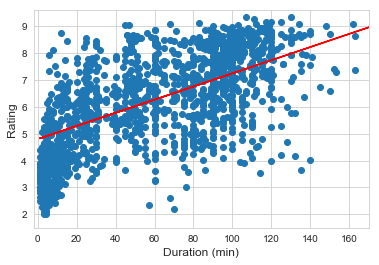

In [17]:
plt.scatter(df.loc[df['Format'] == 'Movie', 'Duration'], df.loc[df['Format'] == 'Movie', 'Rating'])
m = df.loc[df['Format'] == 'Movie', 'Duration'].corr(df.loc[df['Format'] == 'Movie', 'Rating'])

linear_regressor = LinearRegression()  # create object for the class
mean_dur = df.loc[df['Format'] == 'Movie', 'Duration'].mean()
mean_rat = df.loc[df['Format'] == 'Movie', 'Rating'].mean()
linear_regressor.fit(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1), df.loc[df['Format'] == 'Movie', 'Rating'].fillna(value=mean_rat).values.reshape(-1, 1))  # perform linear regression
Y_pred = linear_regressor.predict(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1))  # make predictions

plt.plot(df.loc[df['Format'] == 'Movie', 'Duration'].fillna(value=mean_dur).values.reshape(-1, 1), Y_pred, color='red')
plt.xlim(-2, 170)
plt.ylim(1.5, 9.6)
plt.xlabel('Duration (min)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
print(m)

In [18]:
def labelsFromBins(bins, left='[', sep=',', right=')'):
    labels = []
    for i in range(len(bins) - 1):
        label = left + str(bins[i]) + sep + str(bins[i + 1]) + right
        labels.append(label)
    return labels

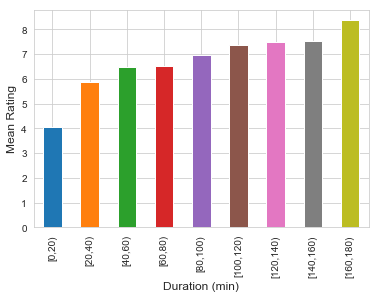

In [19]:
bins = range(0, 200, 20)
def durSplitter(df, ind):
    if df.loc[ind, 'Duration'] == np.NaN:
        return 'Null'
    for i in bins:
        if df.loc[ind, 'Duration'] >= i and df.loc[ind, 'Duration'] < (i + 20):
            return '[' + str(i) + ',' + str(i + 20) + ')'


ax = df.loc[df['Format'] == 'Movie'].groupby(lambda x: durSplitter(df, x))['Rating'].mean().sort_values().plot(kind='bar')
ax.set_xlabel('Duration (min)', fontsize=12)
ax.set_ylabel('Mean Rating', fontsize=12)
_ = ax.set_xticklabels(labelsFromBins(bins))

### 2. How does the number of episodes affect rating?

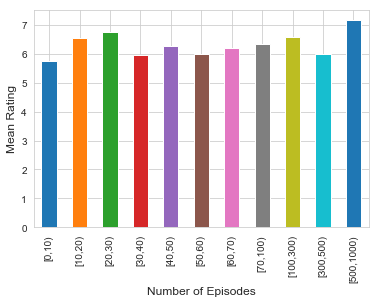

In [20]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 100, 300, 500, 1000]
def epsSplitter(df, ind):
    if df.loc[ind, 'Episodes'] == np.NaN:
        return 'Null'
    for i in range(len(bins) - 1):
        if df.loc[ind, 'Episodes'] >= bins[i] and df.loc[ind, 'Episodes'] < bins[i + 1]:
            return bins[i + 1]

ax = df.loc[df['Format'] == 'TV'].groupby(lambda x: epsSplitter(df, x))['Rating'].mean().plot(kind='bar')
ax.set_xlabel('Number of Episodes', fontsize=12)
ax.set_ylabel('Mean Rating', fontsize=12)
_ = ax.set_xticklabels(labelsFromBins(bins))

### Find relationship between tags and rating

In [21]:
def listTags(tag_col):
    uniq_tags = []
    for tag_row in tag_col:
        if type(tag_row) != float:
            for each in tag_row:
                if each not in uniq_tags:
                    uniq_tags.append(each)
    return uniq_tags

In [22]:
tags = listTags(df['Tags'])

In [23]:
len(tags)

468

In [24]:
%%time
tag_count = {tag: 0 for tag in tags}

for row in df['Tags']:
    if type(row) != float:
        for tag in row:
            tag_count[tag] += 1
            
tag_list = list(tag_count.keys())
count_list = list(tag_count.values())

CPU times: user 16.7 ms, sys: 620 µs, total: 17.3 ms
Wall time: 16.8 ms


In [25]:
rating_list = []
for each in tag_list:
    rating_list.append(df.loc[np.array(contains('Tags', [each])), 'Rating'].mean())

In [26]:
tag_df = pd.DataFrame(list(zip(tag_list, rating_list, count_list)), columns=['Tag', 'Rating', 'Count'])

In [35]:
tag_df.loc[tag_df['Count'] > 100].sort_values('Rating', ascending=False).head(40)

,Tag,Rating,Count
55,Overpowered Main Characters,7.852018,117
66,Iyashikei,7.778679,114
32,Psychological,7.472484,173
83,Contemporary Fantasy,7.420376,154
121,Urban Fantasy,7.330176,106
56,Political,7.318339,115
96,Based on a Light Novel,7.184895,616
2,Drama,7.126992,1262
24,School Club,7.080304,233
4,Mystery,7.048184,346


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

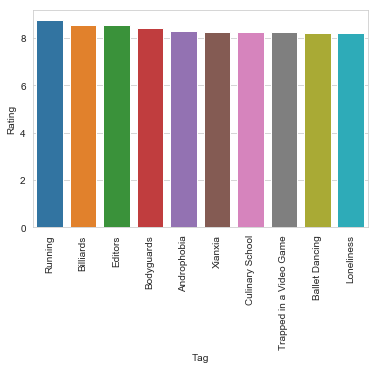

In [28]:
sns.set_style("whitegrid")
tag_rating_graph = sns.barplot(x="Tag", y="Rating", data=tag_df.sort_values('Rating', ascending=False).head(10))
plt.xticks(rotation=90)